In [1]:
# %load /home/swozny/my_imports.ipy
# Stdlib
from functools import partial
from pprint import pprint

import numpy as np
import pandas as pd

pd.set_option('display.max_columns',102)
pd.set_option('display.max_colwidth', -1)

import sklearn
import sklearn.linear_model
import sklearn.ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, StratifiedKFold, train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.metrics import confusion_matrix


# Visualization 

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

custom_style = {'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white', }
sns.set_style( rc=custom_style)
sns.factorplot=partial(sns.factorplot,errcolor='white')
mpl.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.figsize']=(10,10)
jtplot.style('monokai')


# Custom stuff
from swozny_ml import *



<class 'sklearn.multioutput.MultiOutputRegressor'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.ensemble.voting_classifier.VotingClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimators'
<class 'sklearn.multiclass.OneVsRestClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multiclass.OneVsOneClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multiclass.OutputCodeClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multioutput.MultiOutputClassifier'> failed to init because __init__() missing 1 required positional argument: 'estimator'
<class 'sklearn.multioutput.ClassifierChain'> failed to init because __init__() missing 1 required positional argument: 'base_estimator'


/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. This module will be removed in 0.20

# Split

In [4]:
df=pd.read_csv('titanic_preprocessed.csv',index_col=['PassengerId'])
X_train=df[~df.Survived.isnull()].drop('Survived',axis=1)
y_train=df[~df.Survived.isnull()].Survived
X_train.head()

,Embarked_Q,Embarked_S,Sex_male,Pclass_2,Pclass_3,Fare_-1,Fare_0,Fare_1,Fare_2,Age_1,Age_2,Age_3,Age_4,Familysize,Alone,SmallFamily,LargeFamily,Name_MASTER,Name_MISS,Name_MR,Name_MRS,Name_NOBLE,Name_PHD,Ticket_$LIVE,Ticket_OTHER,Cabin_N,Cabin_S,Cabin_X
PassengerId,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1
2,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
3,0,1,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1
4,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0
5,0,1,1,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1


# Train

Evaluating AdaBoostClassifier                       ... Score 0.81
Evaluating BaggingClassifier                        ... Score 0.81
Evaluating DecisionTreeClassifier                   ... Score 0.80
Evaluating ExtraTreeClassifier                      ... Score 0.78
Evaluating ExtraTreesClassifier                     ... Score 0.80
Evaluating GradientBoostingClassifier               ... Score 0.82
Evaluating KNeighborsClassifier                     ... Score 0.80
Evaluating PassiveAggressiveClassifier              ...

/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.passive_aggressive.PassiveAggressiveClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


 Score 0.78
Evaluating RandomForestClassifier                   ... Score 0.80
Evaluating RidgeClassifier                          ... Score 0.83
Evaluating SGDClassifier                            ...

/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


 Score 0.74
Evaluating LogisticRegression                       ... Score 0.83
                                                                  Algorithm  \
1   <class 'sklearn.ensemble.bagging.BaggingClassifier'>                      
0   <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'>             
5   <class 'sklearn.ensemble.gradient_boosting.GradientBoostingClassifier'>   
9   <class 'sklearn.linear_model.ridge.RidgeClassifier'>                      
11  <class 'sklearn.linear_model.logistic.LogisticRegression'>                

        Mean       Std  
1   0.810329  0.017167  
0   0.813718  0.008675  
5   0.823842  0.032596  
9   0.828302  0.010380  
11  0.829438  0.014842  


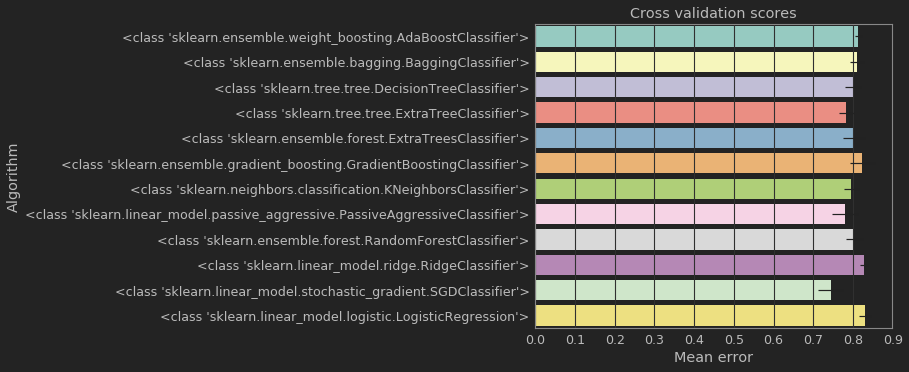

In [6]:
# %load classify.py
# Benchmark different models
from sklearn.linear_model import LogisticRegression

from genetic.estimator_params import params

classifiers = [estimator for estimator in params if "Classifier" in estimator.__name__] + [LogisticRegression]
benchmark = benchmark_models(classifiers, X_train, y_train, scoring='accuracy')
considered_algorithms = benchmark.sort_values('Mean').tail(5)
# Report
plot_benchmark(benchmark)
print(considered_algorithms)

In [7]:
# Tune the model
tuned = tune_params(considered_algorithms['Algorithm'], X_train, y_train, scoring='accuracy')
# tuned_models_models = tune_params_genetic(considered_algorithms['Algorithm'], X_train, y_train, scoring='accuracy')

Tuning BaggingClassifier with {'n_estimators': [10, 100, 200]}...
0.812570145903
Tuning AdaBoostClassifier with {'algorithm': ['SAMME.R', 'SAMME'], 'learning_rate': [0.001, 0.01, 0.1], 'n_estimators': [10, 100, 200]}...
0.827160493827
Tuning GradientBoostingClassifier with {'criterion': ['mse', 'mae'], 'learning_rate': [0.001, 0.01, 0.1], 'loss': ['exponential', 'deviance'], 'n_estimators': [10, 100, 200]}...
0.829405162738
Tuning RidgeClassifier with {'alpha': [0.0, 0.5, 0.6666666666666666, 0.3333333333333333, 0.16666666666666666, 0.8333333333333333, 1.0, 1.1666666666666665, 1.3333333333333333, 1.5]}...


/home/swozny/untitled5/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 4.241699906160322e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.2695484655152314e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number: 3.457805821664827e-17
  ' condition number: {}'.format(rcond), RuntimeWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/scipy/linalg/basic.py:223: RuntimeWarning: scipy.linalg.solve
I

0.830527497194
Tuning LogisticRegression with {'C': array([ 0.1       ,  0.31111111,  0.52222222,  0.73333333,  0.94444444,
        1.15555556,  1.36666667,  1.57777778,  1.78888889,  2.        ])}...
0.830527497194


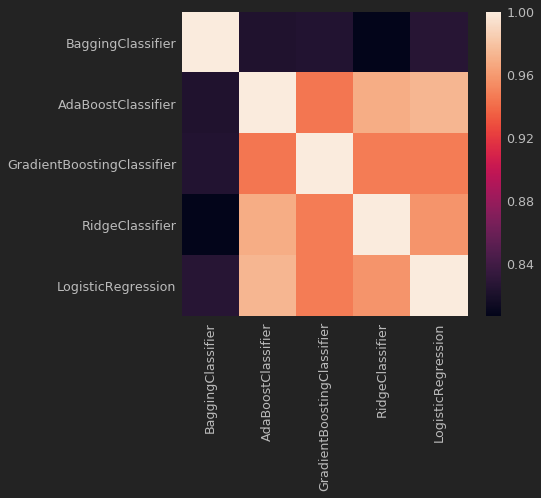

In [9]:
# Calibrate
from sklearn.calibration import CalibratedClassifierCV
calibrated = [CalibratedClassifierCV(model).fit(X_train, y_train) for model in tuned]

# Correlation
predictions = pd.concat([pd.Series(model.predict(X_train), name=type(model.base_estimator).__name__) for model in calibrated],axis=1)
sns.heatmap(predictions.corr())

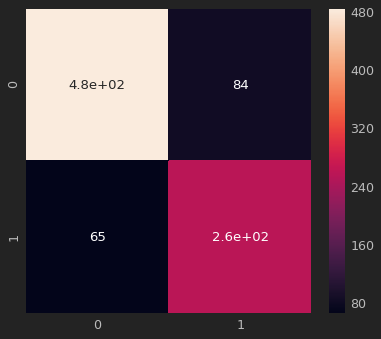

In [13]:
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_predict
# Ensemble
survival_model = VotingClassifier([(type(model.base_estimator).__name__, model) for model in calibrated], voting='hard')
survival_model.fit(X_train, y_train)

# Predict
y_pred = cross_val_predict(survival_model, X=X_train, y=y_train)

# Confusion
sns.heatmap(confusion_matrix(y_pred, y_train), annot=True)

In [15]:
cross_val_score(survival_model, X=X_train, y=y_train,cv=4).mean()

0.83280124595287142

In [19]:
import tensorflow as tf
import tflearn
from tflearn.data_utils import to_categorical
cat = pd.read_csv('titanic_preprocessed.csv',index_col='PassengerId')
X_test = cat[cat['Survived'].isnull()].drop('Survived',axis=1)
train = cat[cat['Survived'].notnull()]
X=train.drop('Survived',axis=1).as_matrix()
y=train.Survived
y = to_categorical(y.as_matrix(),nb_classes=2)
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1)

tf.reset_default_graph()
net = tflearn.input_data(shape=[None, 28])
net = tflearn.fully_connected(net, 64)
net = tflearn.fully_connected(net, 2, activation='softmax')
net = tflearn.regression(net)
model = tflearn.DNN(net)

# Start training (apply gradient descent algorithm)
model.fit(X_train, y_train, n_epoch=100, batch_size=16, show_metric=True,validation_set=(X_validation,y_validation))
survival=model.predict(X_test)

Training Step: 5099  | total loss: 0.72782 | time: 0.204s
| Adam | epoch: 100 | loss: 0.72782 - acc: 0.7117 -- iter: 800/801
Training Step: 5100  | total loss: 0.72518 | time: 1.209s
| Adam | epoch: 100 | loss: 0.72518 - acc: 0.7093 | val_loss: 0.43922 - val_acc: 0.8222 -- iter: 801/801
--


In [ ]:
class WrapBinaryNN(object):
    def __init__(self,estimator):
        self.estimator = estimator
    def predict(self,X,*args,**kwargs):
        pred = self.estimator.predict(X=X,*args,**kwargs)
        return (pred[:,0]<0.5).astype(int)
e=WrapBinaryNN(model)
        

# Calibrate

# Ensemble

# Predict

In [ ]:
X_test['Survived']= y_pred
X_test['Survived'].to_csv('prediction.csv',header=True)
X_test['Survived']= y_predNN
X_test['Survived'].to_csv('predictionNN.csv',header=True)